<a href="https://colab.research.google.com/github/AlexJTStudent/AlexJStudent.github.io/blob/main/Module4Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# prompt: use this link for the data: https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bikes.csv

import pandas as pd

# Load the dataframe.
df_bikes = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bikes.csv')

# Print some info.
df_bikes.info()
print(df_bikes.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112475 entries, 0 to 112474
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   dteday        112475 non-null  object 
 1   hr            112475 non-null  float64
 2   casual        112475 non-null  int64  
 3   registered    112475 non-null  int64  
 4   temp_c        112475 non-null  float64
 5   feels_like_c  112475 non-null  float64
 6   hum           112475 non-null  float64
 7   windspeed     112475 non-null  float64
 8   weathersit    112475 non-null  int64  
 9   season        112475 non-null  int64  
 10  holiday       112475 non-null  int64  
 11  workingday    112475 non-null  int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 10.3+ MB
     dteday   hr  casual  registered  temp_c  feels_like_c     hum  windspeed  \
0  1/1/2011  0.0       3          13     3.0           3.0  0.7957        0.8   
1  1/1/2011  1.0       8          30     1.7    

In [4]:
# prompt: make a tensorflow neural network model

import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

# Assuming 'count' is the target variable and other columns are features
X = df_bikes.drop('count', axis=1)
y = df_bikes['count']

# Convert categorical features to numerical using one-hot encoding if needed
X = pd.get_dummies(X, columns=['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit'])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1) # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae']) # Use appropriate loss and metrics for regression

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2) # Adjust epochs and batch size as needed

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print(f"Mean Absolute Error: {mae}")

# Make predictions
predictions = model.predict(X_test)
predictions


KeyError: "['count'] not found in axis"

In [5]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

# Load the dataframe (assuming it's already loaded as 'df_bikes').
# df_bikes = pd.read_csv('your_data_source.csv')

# Create the target variable by combining 'casual' and 'registered'
df_bikes['total_count'] = df_bikes['casual'] + df_bikes['registered']

# Define features and target
X = df_bikes[['temp_c', 'feels_like_c', 'hum', 'windspeed', 'weathersit', 'season', 'holiday', 'workingday']]
y = df_bikes['total_count']

# One-hot encode categorical features
X = pd.get_dummies(X, columns=['weathersit', 'season', 'holiday', 'workingday'])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print(f"Mean Absolute Error: {mae}")

# Make predictions
predictions = model.predict(X_test)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 113390.3125 - mae: 243.1920 - val_loss: 85956.3984 - val_mae: 215.8419
Epoch 2/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - loss: 85492.3828 - mae: 217.6653 - val_loss: 81624.4141 - val_mae: 208.2635
Epoch 3/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 82931.4609 - mae: 212.6183 - val_loss: 79374.5156 - val_mae: 203.1673
Epoch 4/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 80729.6719 - mae: 209.0209 - val_loss: 78288.8438 - val_mae: 200.8338
Epoch 5/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 79184.2734 - mae: 206.5372 - val_loss: 78544.4688 - val_mae: 200.3522
Epoch 6/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 78554.8672 - mae: 205.1937 - val_loss: 78627.8906 - val_mae: 210.7880
Epoch 7/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 78600.2188 - mae: 205.5919 - val_loss: 77284.9609 - val_mae: 204.3620
Epoch 8/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 78882.2812 

703/703 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
703/703 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
703/703 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
703/703 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
703/703 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
703/703 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
703/703 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
703/703 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
703/703 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
703/703 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
703/703 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
703/703 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
703/703 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
703/703 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
703/703 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
703/703 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
703/703 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
703/703 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
703/703 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
703/703 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
703/703 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
703/703 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
703/703 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
703/703 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
703/703 ━━━━━━━━

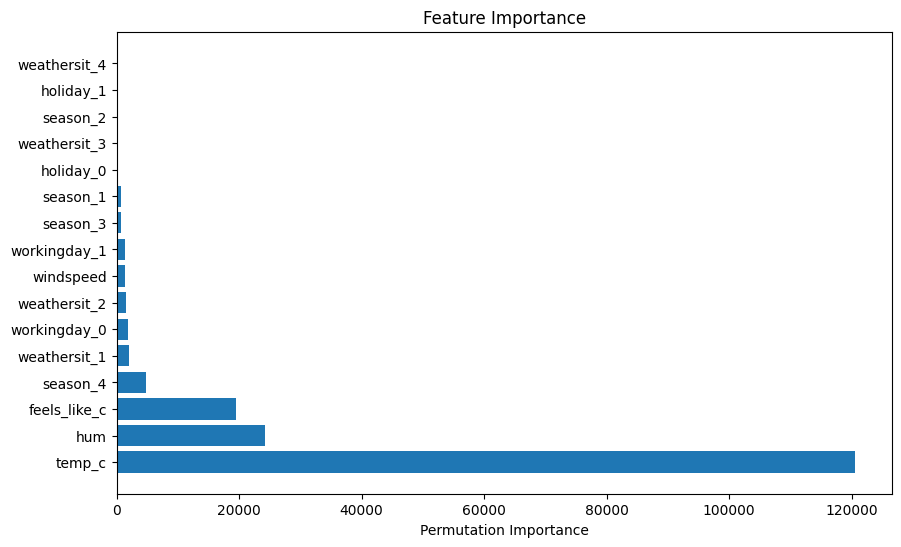

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have trained your model and it's named 'model'
# and your features are in a DataFrame called 'X'

# Get feature importances using permutation importance
from sklearn.inspection import permutation_importance
results = permutation_importance(model, X_test, y_test, scoring='neg_mean_squared_error')

# Sort feature importances in descending order
importance = results.importances_mean
sorted_idx = importance.argsort()[::-1] # Reverse the order to get descending sort

# Create horizontal bar plot
fig, ax = plt.subplots(figsize=(10, 6)) # Adjust figsize as needed
ax.barh(X.columns[sorted_idx], importance[sorted_idx])
ax.set_xlabel("Permutation Importance")
ax.set_title("Feature Importance")
plt.show()